## Visualizing Palestine ----- Geospatial Analysis (West Bank)

  ## Palestine ❤️ <br /> West Bank


2024-08-22 18:40:23,584 INFO:Getting geometry for city: West Bank
2024-08-22 18:40:23,654 INFO:Processing Sub-region 1/16
2024-08-22 18:40:46,667 INFO:Successfully downloaded road network for sub-region 1
2024-08-22 18:40:47,868 INFO:Successfully converted the graph to GeoDataFrame for sub-region 1
2024-08-22 18:40:48,004 INFO:Completed processing sub-region 1 
2024-08-22 18:40:48,005 INFO:Processing Sub-region 2/16
2024-08-22 18:41:34,678 INFO:Successfully downloaded road network for sub-region 2
2024-08-22 18:41:37,919 INFO:Successfully converted the graph to GeoDataFrame for sub-region 2
2024-08-22 18:41:38,109 INFO:Completed processing sub-region 2 
2024-08-22 18:41:38,111 INFO:Processing Sub-region 3/16
2024-08-22 18:42:18,932 INFO:Successfully downloaded road network for sub-region 3
2024-08-22 18:42:23,393 INFO:Successfully converted the graph to GeoDataFrame for sub-region 3
2024-08-22 18:42:23,630 INFO:Completed processing sub-region 3 
2024-08-22 18:42:23,631 INFO:Processing 

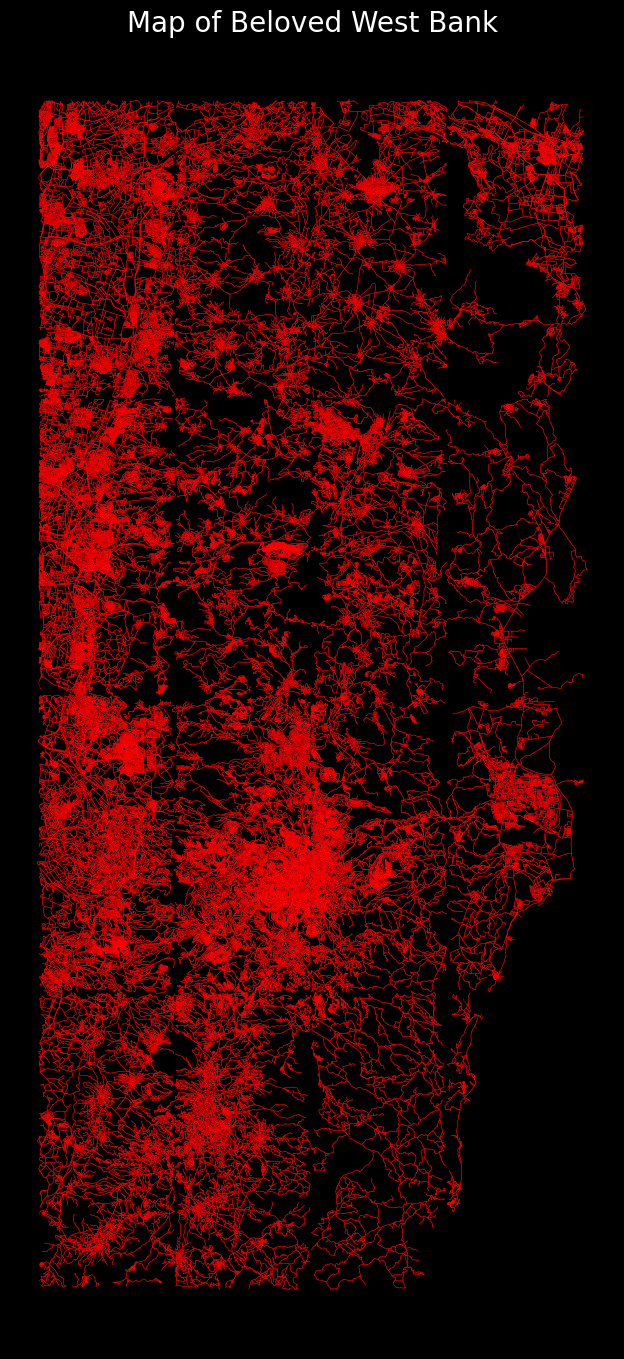

In [11]:
## setting up logging 
logging.basicConfig(stream=sys.stdout, level=logging.INFO,
                   format='%(asctime)s %(levelname)s:%(message)s')

def subdivide_polygon(polygon, num_divisions):
    """Subdivide a polygon into smaller chuncks."""
    minx, miny, maxx, maxy = polygon.bounds
    width = (maxx - minx) / num_divisions
    height = (maxy - miny) / num_divisions
    
    sub_polygons = []
    for i in range(num_divisions):
        for j in range(num_divisions):
            sub_minx = minx + i * width
            sub_miny = miny + j * height
            sub_maxx = sub_minx + width
            sub_maxy = sub_miny + height
            sub_poly = box(sub_minx, sub_miny, sub_maxx, sub_maxy)
            sub_polygons.append(sub_poly)
    return sub_polygons

def process_city(city_name):
    """ Process the road network for the city."""
    #Getting the geometry 
    logging.info(f"Getting geometry for city: {city_name}")
    admin = ox.geocode_to_gdf(city_name)
    admin_poly = admin.geometry.values[0]
    
    #Subdividing the polygon
    sub_polygons = subdivide_polygon(admin_poly, num_divisions=4)
    
    
    
    # Initializing empty lists for the nodes and edges
    all_nodes = []
    all_edges = []
    
    
    #processing the sub-regions
    for i, sub_poly in enumerate(sub_polygons):
        logging.info(f"Processing Sub-region {i+1}/{len(sub_polygons)}")
        
        #downloading the road network for the sub-regions
        try:
            G = ox.graph_from_polygon(sub_poly)
            logging.info(f"Successfully downloaded road network for sub-region {i+1}")
        except Exception as e:
            logging.info(f"Error processing for sub-region {i+1}: {e}")
            continue

        # Converting the graph to GeoDAtaFrames   
        try:
            nodes, edges = ox.graph_to_gdfs(G)
            logging.info(f"Successfully converted the graph to GeoDataFrame for sub-region {i+1}")
        except Exception as e:
            logging.info(f"Error converting the graph to GeoDataFrame for sub-region {i+1}: {e}")
            continue
            
        
        
        #appending to the main lists 
        all_nodes.append(nodes)
        all_edges.append(edges)
        
        
        gc.collect() ## calling garbage collection !!!!!!
        logging.info(f"Completed processing sub-region {i+1} ")
        
    #concatenating nodes and edges    
    try:
        all_nodes = pd.concat(all_nodes, ignore_index=True)
        all_edges = pd.concat(all_edges, ignore_index=True)
        logging.info(f"Successfully concatenated all nodes and edges")
    except Exception as e:
        logging.info(f"Error concatenating nodes and edges: {e}")
        
        
        
    #Plotting the edges
    plt.style.use('dark_background')
    fig, ax = plt.subplots(1, 1, figsize=(17, 17))
    all_edges.plot(ax=ax, edgecolor='Red', linewidth=0.3)
    ax.axis('off')
    
    plt.title(f"Map of Beloved {city_name}", fontsize=20)
    plt.show()


#defining City name

city_name = 'West Bank'
process_city(city_name)